Import necessary libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from PIL import Image
import os
from sklearn.preprocessing import StandardScaler

Load the data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


1. Describe the data
The describe() method returns description of the data in the DataFrame.

Since the DataFrame contains numerical data, the description contains these information for each column:
count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

In [3]:
print(train_df.describe())

                id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   

2. Clean the data 

2.1 Check the data for missing values or duplicates and carry out proper correction methods:

2.1.1 Handling missing values => we will fill missing values with the mode of each column

In [5]:
train_df.fillna(train_df.mode(), inplace=True)
test_df.fillna(test_df.mode(), inplace=True)

2.1.2 Checking for duplicates and removing them

In [6]:
print("Before removing duplicates: ", train_df.shape)
train_df.drop_duplicates(inplace=True)
print("After removing duplicates: ", train_df.shape)

Before removing duplicates:  (990, 194)
After removing duplicates:  (990, 194)


2.1.3 Verify if cleaning was successful

In [7]:
print("Missing values in training set after cleaning:\n", train_df.isnull().sum())
print("Duplicates in training set after cleaning:", train_df.duplicated().sum())

Missing values in training set after cleaning:
 id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64
Duplicates in training set after cleaning: 0


3. Visualize the data and remove the outliers => We used the Box Plot and IQR

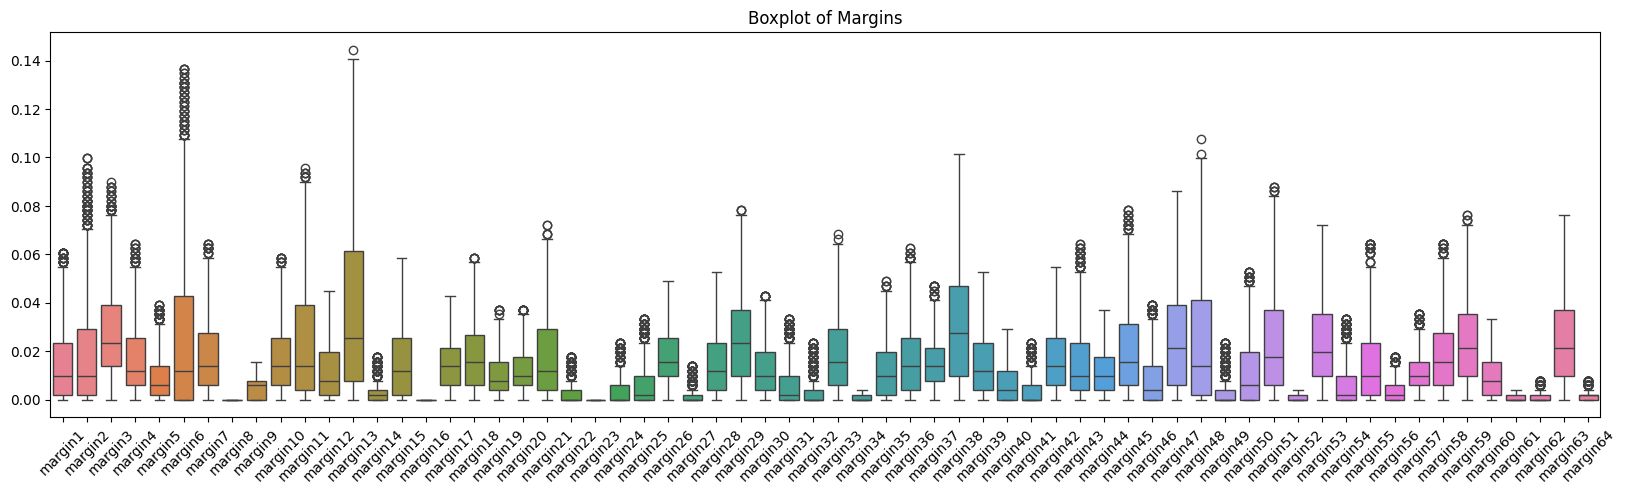

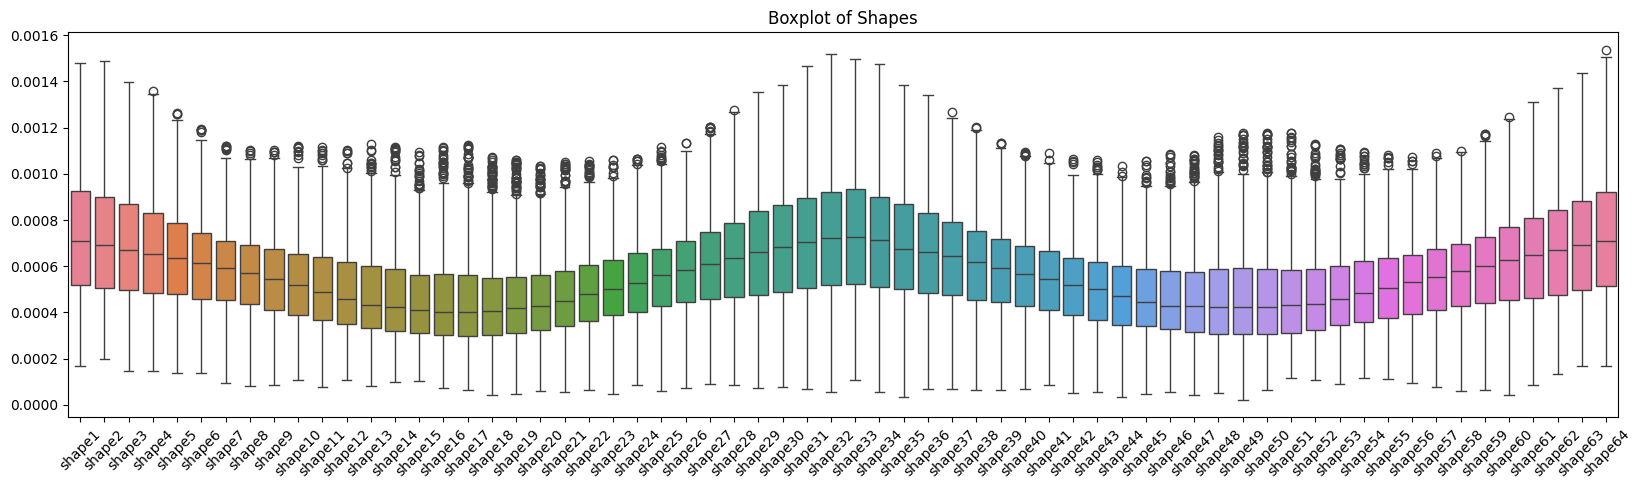

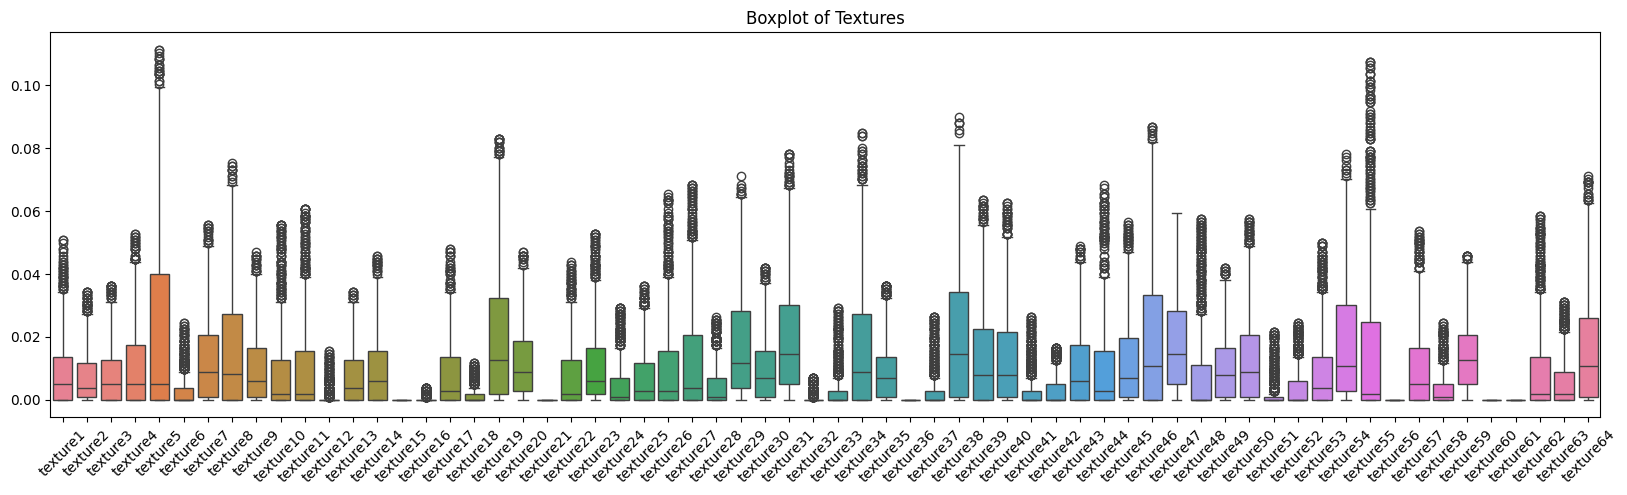

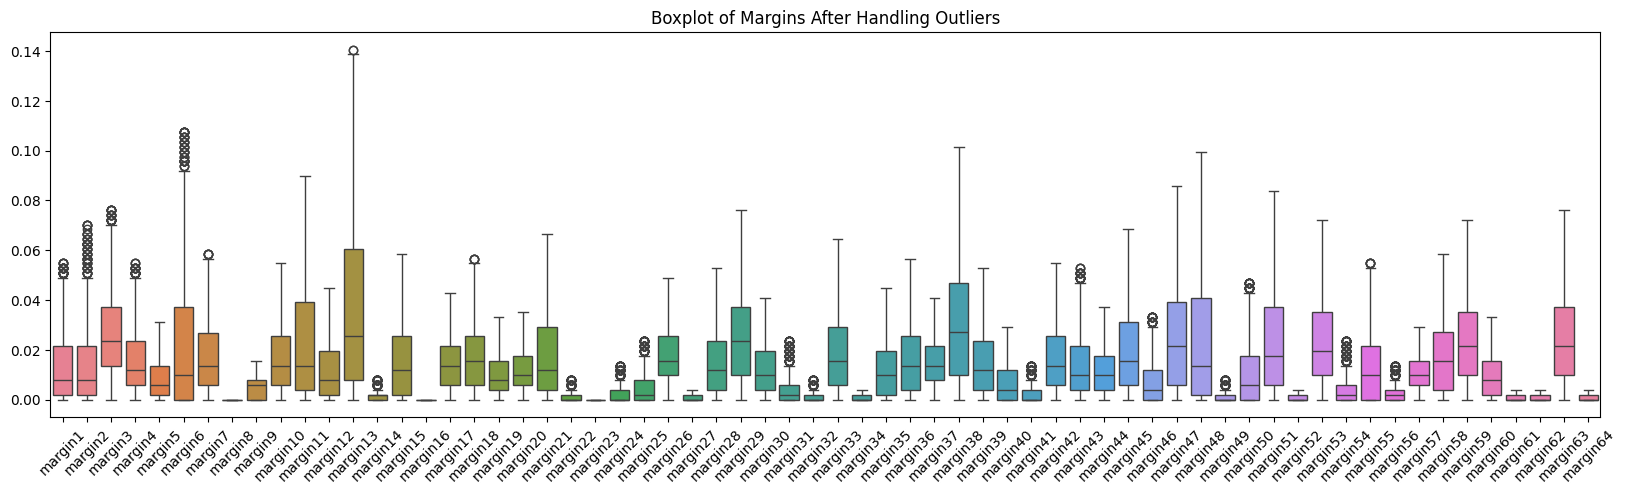

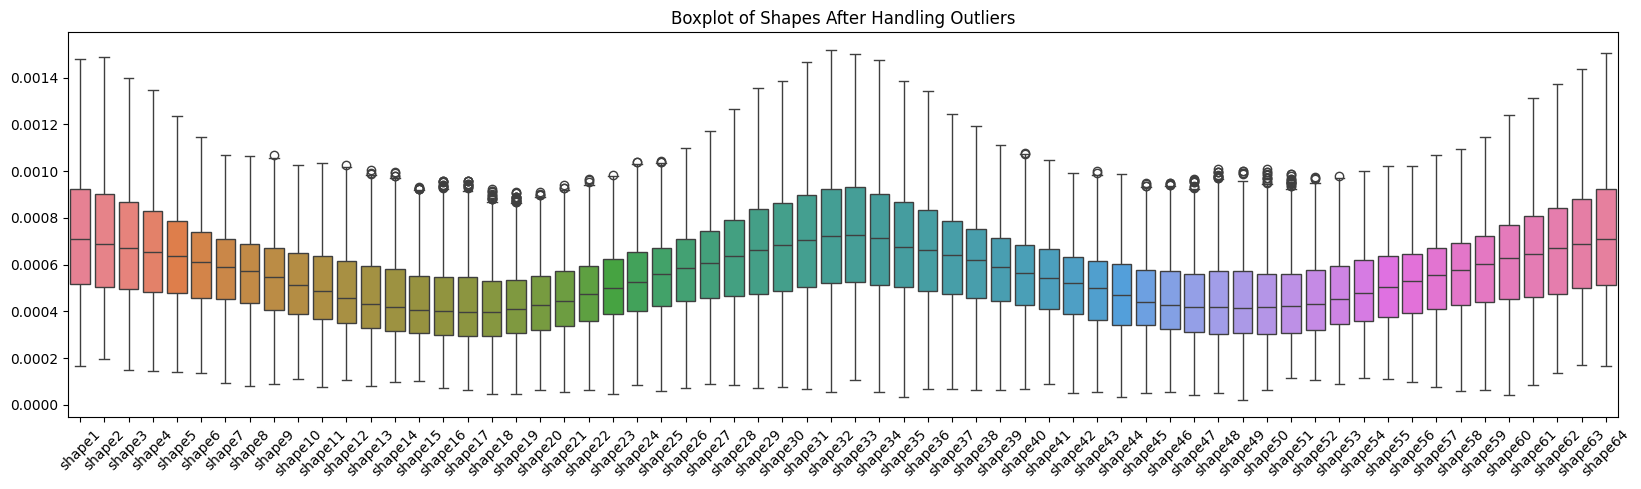

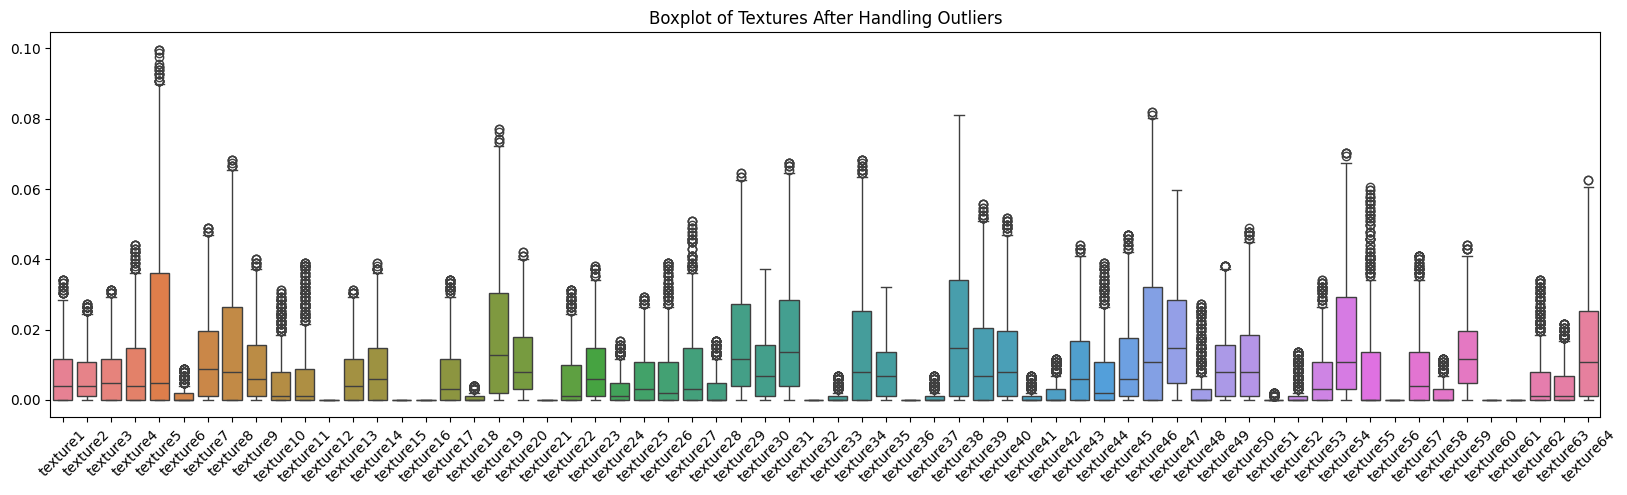

In [17]:
# Extract features by type (margins, shapes, textures)
margin_columns = [f'margin{i}' for i in range(1, 65)]
shape_columns = [f'shape{i}' for i in range(1, 65)]
texture_columns = [f'texture{i}' for i in range(1, 65)]

# Visualize the distribution of numeric features using box plots - Margins
plt.figure(figsize=(20, 5))
sns.boxplot(data=train_df[margin_columns])
plt.title('Boxplot of Margins')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of numeric features using box plots - Shapes
plt.figure(figsize=(20, 5))
sns.boxplot(data=train_df[shape_columns])
plt.title('Boxplot of Shapes')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of numeric features using box plots - Textures
plt.figure(figsize=(20, 5))
sns.boxplot(data=train_df[texture_columns])
plt.title('Boxplot of Textures')
plt.xticks(rotation=45)
plt.show()

# Identify and handle outliers for each feature type
def handle_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold = 1.5
    outliers = ((df[columns] < (Q1 - outlier_threshold * IQR)) |
                 (df[columns] > (Q3 + outlier_threshold * IQR)))
    df[columns] = np.where(outliers, np.nan, df[columns])

# Handle outliers for each feature type
handle_outliers(train_df, margin_columns)
handle_outliers(train_df, shape_columns)
handle_outliers(train_df, texture_columns)

# Visualize the data after handling outliers - Margins
plt.figure(figsize=(20, 5))
sns.boxplot(data=train_df[margin_columns])
plt.title('Boxplot of Margins After Handling Outliers')
plt.xticks(rotation=45)
plt.show()

# Visualize the data after handling outliers - Shapes
plt.figure(figsize=(20, 5))
sns.boxplot(data=train_df[shape_columns])
plt.title('Boxplot of Shapes After Handling Outliers')
plt.xticks(rotation=45)
plt.show()

# Visualize the data after handling outliers - Textures
plt.figure(figsize=(20, 5))
sns.boxplot(data=train_df[texture_columns])
plt.title('Boxplot of Textures After Handling Outliers')
plt.xticks(rotation=45)
plt.show()


# Save the preprocessed data
train_df.to_csv('preprocessed_train.csv', index=False)



4. Draw some of the images 

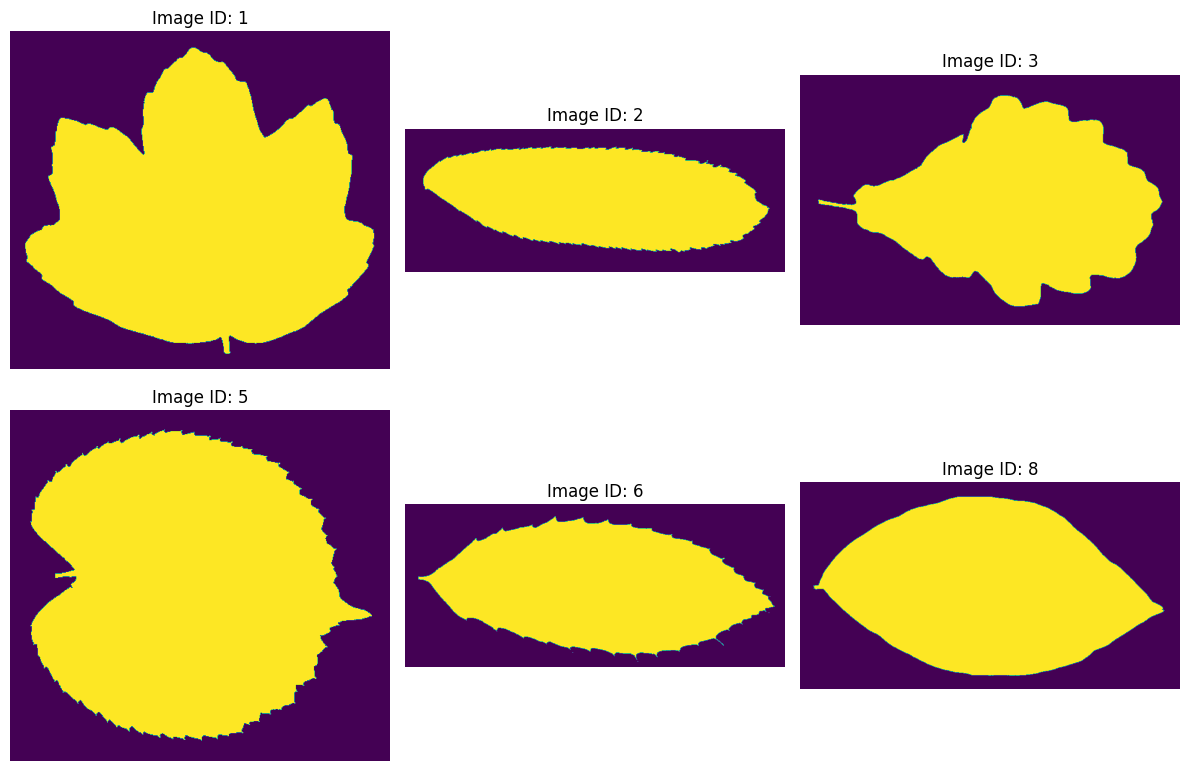

In [26]:
# Path to the directory containing the images
images_dir = 'images/images'

# Display a few sample images
num_images_to_display = 6

plt.figure(figsize=(12, 8))

for i in range(num_images_to_display):
    image_id = train_df.iloc[i]['id']
    image_path = os.path.join(images_dir, f'{image_id}.jpg')

    # Open and display the image using PIL
    img = Image.open(image_path)

    # Create subplots
    plt.subplot(2, 3, i +1 )
    plt.imshow(img)
    plt.title(f'Image ID: {image_id}')
    plt.axis('off')

plt.tight_layout()
plt.show()

5. Carry out required correlation analysis

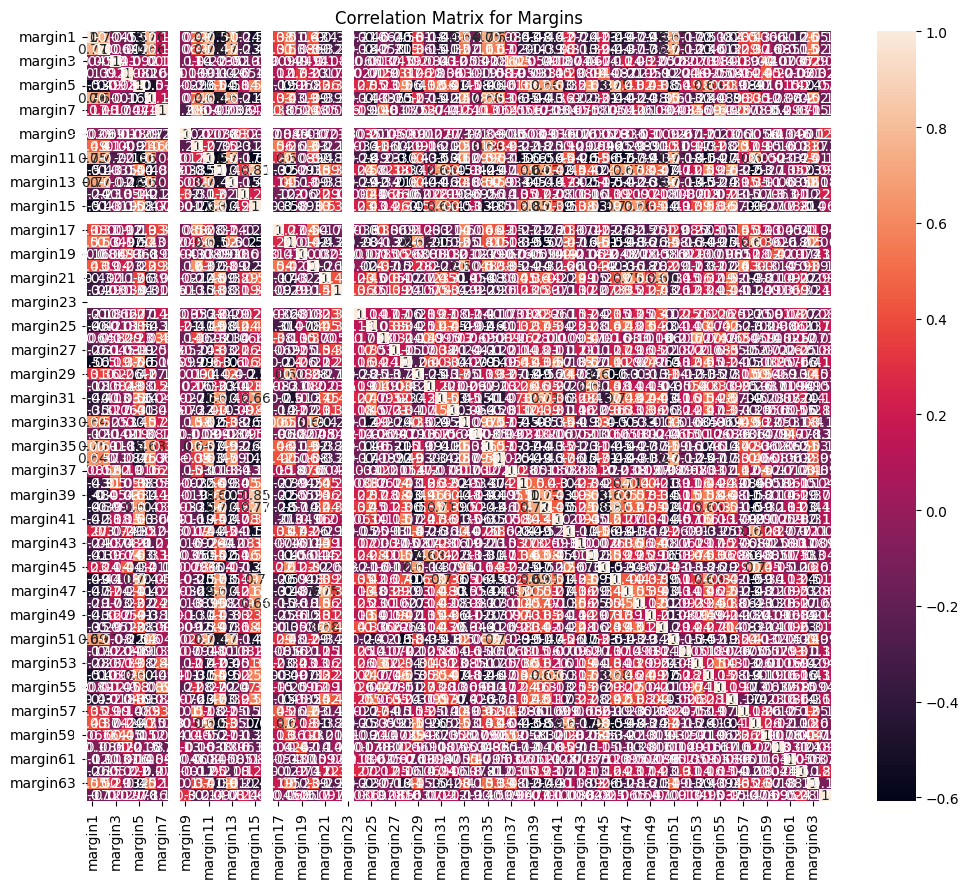

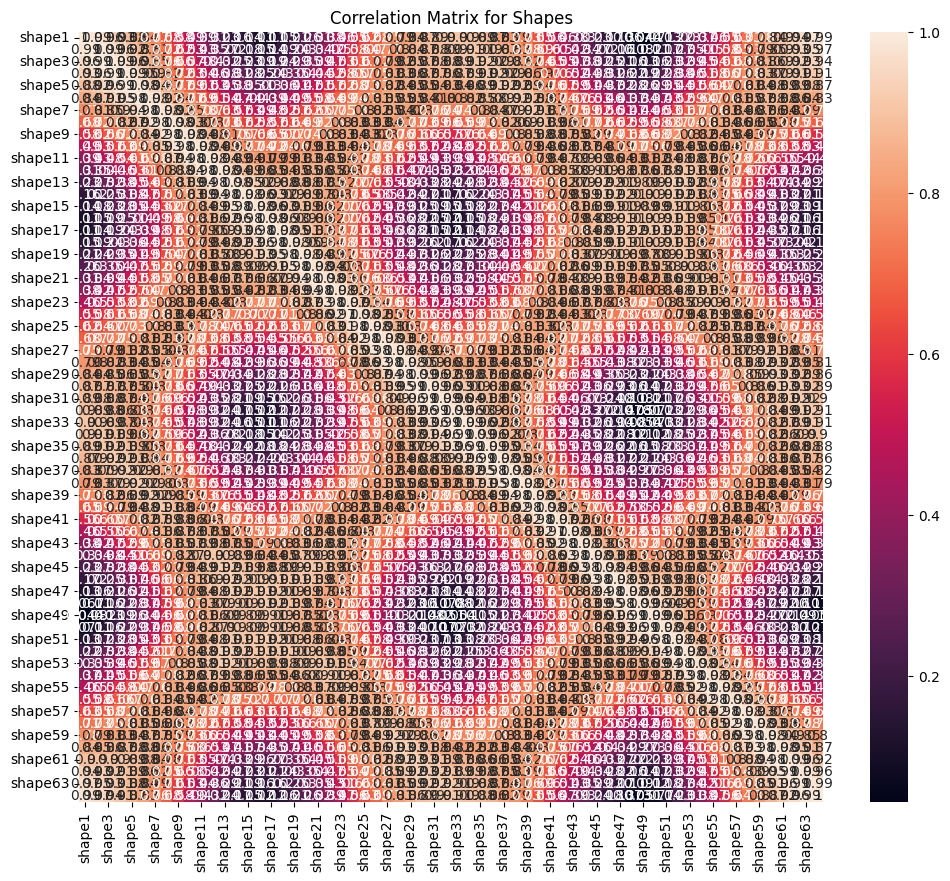

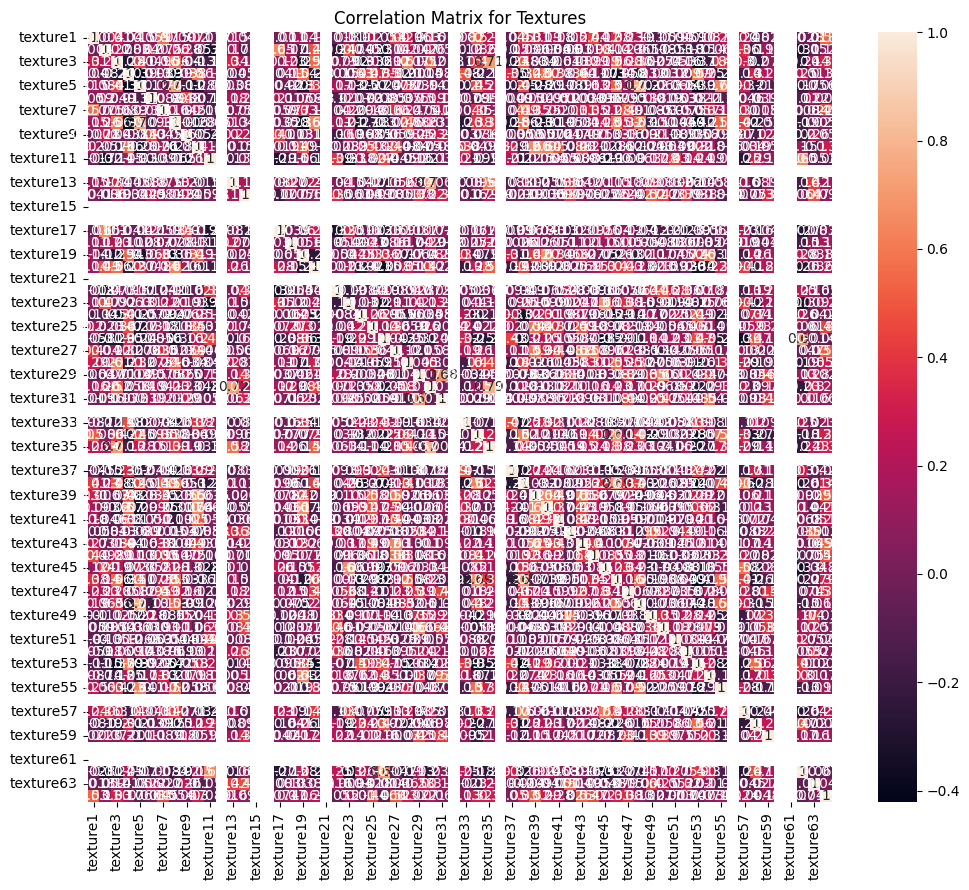

In [32]:
# Extract columns for each feature type
margin_columns = train_df.filter(regex='margin*').columns
shape_columns = train_df.filter(regex='shape*').columns
texture_columns = train_df.filter(regex='texture*').columns

# Calculate correlation matrices for each feature type
correlation_matrix_margin = train_df[margin_columns].corr()
correlation_matrix_shape = train_df[shape_columns].corr()
correlation_matrix_texture = train_df[texture_columns].corr()

# Plot the correlation matrix for margins
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_margin, annot=True)
plt.title('Correlation Matrix for Margins')
plt.show()

# Plot the correlation matrix for shapes
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_shape, annot=True)
plt.title('Correlation Matrix for Shapes')
plt.show()

# Plot the correlation matrix for textures
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_texture, annot=True)
plt.title('Correlation Matrix for Textures')
plt.show()

6. Standardize the data using the z score

In [34]:
features = train_df.drop(['id', 'species'], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Compute mean and standard deviation using the training set
scaler.fit(features)

# Standardize the features
standardized_features = scaler.transform(features)

# Create a DataFrame with standardized features
standardized_df = pd.DataFrame(standardized_features, columns=features.columns)

# Concatenate the standardized features with the target variable ('species')
standardized_df = pd.concat([train_df[['id', 'species']], standardized_df], axis=1)

# Save the standardized data to a new CSV file
standardized_df.to_csv('standardized_train.csv', index=False)

7. Encode the labels

In [ ]:
# Extract the target variable ('species')
target = train_df['species']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the labels into numeric values
encoded_labels = label_encoder.fit_transform(target)

# Create a new DataFrame with encoded labels
encoded_df = pd.DataFrame({'id': train_df['id'], 'encoded_species': encoded_labels})

# Save the encoded data to a new CSV file
encoded_df.to_csv('encoded_train.csv', index=False)